In [1]:
from sklearn.preprocessing import Normalizer
import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset
import numpy as np
from model import GGNN
import torch.nn as nn
import time
import sys
from tqdm import tqdm
from model import Utils
from model import Plot

# Load Data

In [2]:
folder = 'dataset/'
TrainDataset = torch.load(folder + 'train_dataset14.pt')
TestDataset = torch.load(folder + 'test_dataset14.pt')
#UnrelatedDataset = torch.load('unrelated_dataset_rev6.pt')

adj_matrices = torch.load(folder + 'adj_matrices.pt')
dist_matrices = torch.load(folder + 'dist_matrices.pt')

## Hyperparameters

In [3]:
EPOCHS = 400 # 400 Training Epochs

PROPAG_STEPS = 5 # Neighborhood Interation
HIDDEN_LAYER = 64 # Hidden Layeer Size

BATCH_SIZE = 45 # Bath_size to train/test

STEPS_PER_EPOCH = int((len(TrainDataset)/BATCH_SIZE) * 3) # 3 times

## Create a model

In [4]:
model = GGNN.GGNNModel(1, HIDDEN_LAYER, PROPAG_STEPS).cuda()

## Train

In [5]:
model, optimizer, statistics  = Utils.Train(EPOCHS, TrainDataset, model, STEPS_PER_EPOCH,\
                                   adj_matrices, dist_matrices, BATCH_SIZE)


# saving
torch.save(model.state_dict(), '_model_state_dict.pt')
torch.save(optimizer.state_dict(), '_optimizer_state_dict.pt')
torch.save(statistics, '_training_statistics.pt')

Epoch: 68 - Loss: 0.48 - Total_Time: 14.6 mins: 100%|████████████████████████████████| 652/652 [00:13<00:00, 50.09it/s]


Epoch: 76 - Loss: 0.44 - Total_Time: 16.2 mins:  46%|██████████████▊                 | 303/652 [00:05<00:07, 49.53it/s]

C:\Users\Lucas\Desktop\UNESP - projeto Yamatec\Exemplo 14 - Copia\Exemplo 14 - Sub-rede com vazamento próximo + vaza nas juntas\model\Utils.py:63: RuntimeWarning: invalid value encountered in true_divide
  normal_ld = ld/norm


Epoch: 143 - Loss: 0.4 - Total_Time: 30.2 mins: 100%|████████████████████████████████| 652/652 [00:12<00:00, 53.86it/s]


Epoch: 211 - Loss: 0.18 - Total_Time: 44.0 mins: 100%|███████████████████████████████| 652/652 [00:12<00:00, 53.51it/s]


Epoch: 279 - Loss: 2.7 - Total_Time: 57.8 mins: 100%|████████████████████████████████| 652/652 [00:12<00:00, 53.17it/s]


Epoch: 347 - Loss: 0.34 - Total_Time: 71.6 mins: 100%|███████████████████████████████| 652/652 [00:12<00:00, 53.80it/s]


Epoch: 400 - Loss: 1.01 - Total_Time: 82.4 mins: 100%|███████████████████████████████| 652/652 [00:12<00:00, 53.14it/s]


# Test

In [6]:
_, _, statistics_tst  = Utils.Test(EPOCHS, TestDataset, model, STEPS_PER_EPOCH,\
                                   adj_matrices, dist_matrices, BATCH_SIZE)

Epoch: 1 - Loss: 0.43 - Total_Time: 0.0 mins:  24%|████████▏                         | 157/652 [00:02<00:09, 52.93it/s]

C:\Users\Lucas\Desktop\UNESP - projeto Yamatec\Exemplo 14 - Copia\Exemplo 14 - Sub-rede com vazamento próximo + vaza nas juntas\model\Utils.py:141: RuntimeWarning: invalid value encountered in true_divide
  normal_ld = ld/norm


Epoch: 68 - Loss: 0.28 - Total_Time: 13.8 mins: 100%|████████████████████████████████| 652/652 [00:12<00:00, 53.56it/s]


Epoch: 136 - Loss: 0.81 - Total_Time: 27.6 mins: 100%|███████████████████████████████| 652/652 [00:11<00:00, 54.44it/s]


Epoch: 204 - Loss: 0.98 - Total_Time: 41.3 mins: 100%|███████████████████████████████| 652/652 [00:12<00:00, 54.14it/s]


Epoch: 272 - Loss: 0.44 - Total_Time: 55.0 mins: 100%|███████████████████████████████| 652/652 [00:12<00:00, 53.99it/s]


Epoch: 340 - Loss: 0.27 - Total_Time: 68.7 mins: 100%|███████████████████████████████| 652/652 [00:12<00:00, 53.78it/s]


Epoch: 400 - Loss: 0.67 - Total_Time: 80.8 mins: 100%|███████████████████████████████| 652/652 [00:12<00:00, 54.02it/s]


# Plots

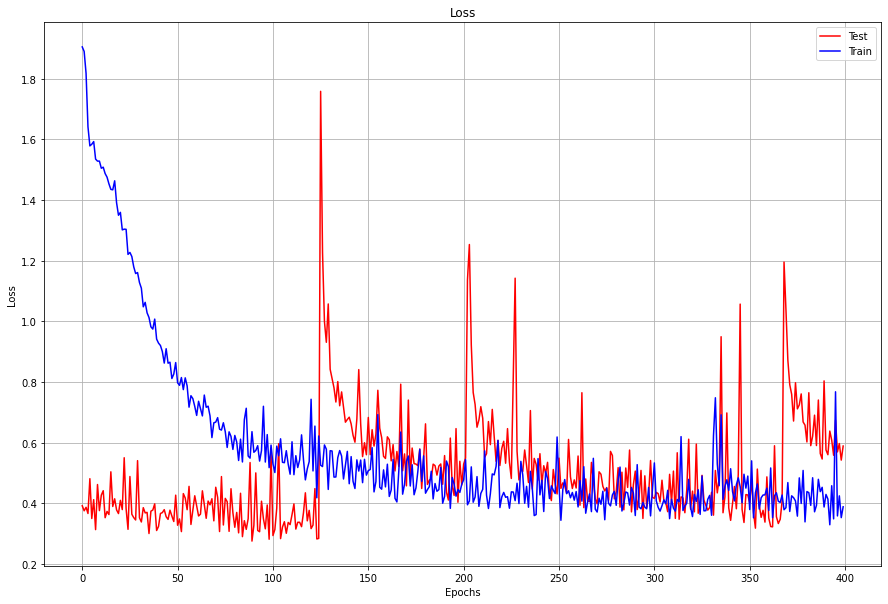

In [7]:
name = 'PROPAG_STEPS: {}, HIDDEN_LAYER: {}, BATCH_SIZE: {}, EPOCHS: {}'.format(PROPAG_STEPS,\
                                                HIDDEN_LAYER, BATCH_SIZE,EPOCHS)
title = 'Loss'

Plot.Plot(statistics['loss_ls'], statistics_tst['loss_ls'], title)

In [8]:
statistics.keys()

dict_keys(['loss_ls', 'accuracy', 'correct', 'predict'])

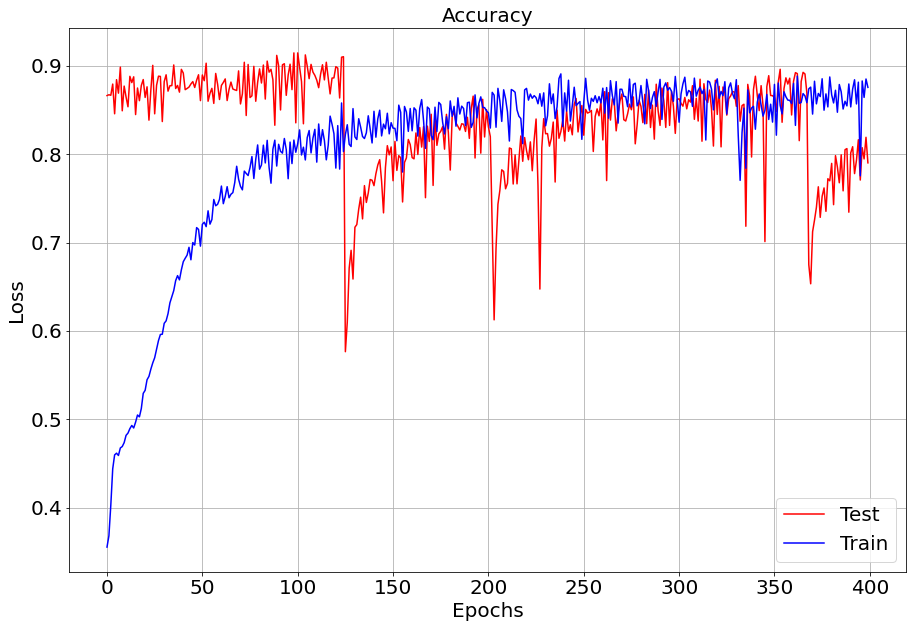

In [9]:
title_Acc = 'Accuracy'
Plot.Plot(statistics['accuracy'], statistics_tst['accuracy'], title_Acc)

>> condusion Matrix <<
Test
Predicted         0         1         2         3         4         5  \
Actual                                                                  
0          0.898257  0.013965  0.006172  0.010185  0.009520  0.008196   
1          0.015872  0.697997  0.044829  0.045521  0.044140  0.042051   
2          0.004087  0.027781  0.814624  0.032951  0.005952  0.010736   
3          0.007499  0.044265  0.059015  0.821843  0.038136  0.041186   
4          0.008469  0.080309  0.012059  0.022362  0.700522  0.145287   
5          0.006776  0.067454  0.011968  0.018644  0.190050  0.729520   
6          0.052917  0.007395  0.004912  0.002962  0.009551  0.019357   
7          0.006123  0.060835  0.046420  0.045532  0.002130  0.003666   

Predicted         6         7  
Actual                         
0          0.076213  0.007620  
1          0.018909  0.084803  
2          0.002251  0.002993  
3          0.006502  0.005847  
4          0.027959  0.053720  
5          0.0226

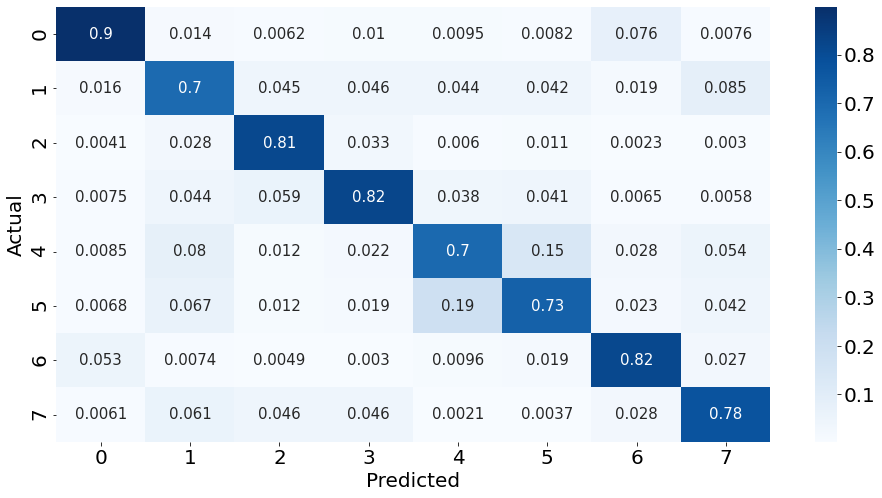

In [10]:
save_name = 'Confusion_Matrix_Train'
color= 'Blues'
folder = 'dataset/'
Plot.Conf_Matrix(statistics['correct'], statistics['predict'], color, folder)

>> condusion Matrix <<
Test
Predicted         0         1         2         3         4         5  \
Actual                                                                  
0          0.923064  0.007853  0.004765  0.006531  0.006581  0.005118   
1          0.011740  0.734819  0.052535  0.039507  0.037939  0.023298   
2          0.002735  0.026564  0.807593  0.040230  0.008811  0.008688   
3          0.006382  0.036203  0.058519  0.836186  0.025379  0.022539   
4          0.004520  0.077433  0.010637  0.014790  0.770425  0.093732   
5          0.002739  0.067407  0.011269  0.014416  0.136775  0.832171   
6          0.045118  0.002641  0.003321  0.002955  0.012272  0.011444   
7          0.003702  0.047080  0.051362  0.045387  0.001817  0.003010   

Predicted         6         7  
Actual                         
0          0.042591  0.005763  
1          0.016399  0.060756  
2          0.002312  0.007880  
3          0.007078  0.005574  
4          0.021822  0.047822  
5          0.0226

NameError: name 'heatmap' is not defined

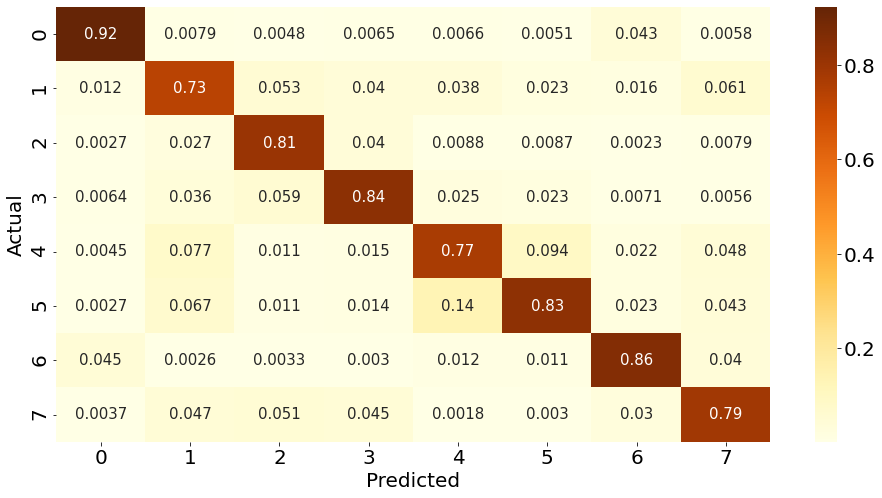

In [11]:
save_name_tst = 'Confusion_Matrix_Test'
color= 'YlOrBr'
Plot.Conf_Matrix(statistics_tst['correct'], statistics_tst['predict'], color, folder)